# Loading and processing a dataset
Since the purpose of this project is understanding the mathematical concepts behind linear regression and implementation of such, the dataset in use will be arbitrary and artificialy created by us.

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Standard imports
import os

# Third-party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import datasets
from sklearn.datasets import make_regression

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
make_regression?

In [21]:
X, y = make_regression(n_samples=500, n_features=1, noise=40, random_state=42)

In [22]:
plt.scatter?

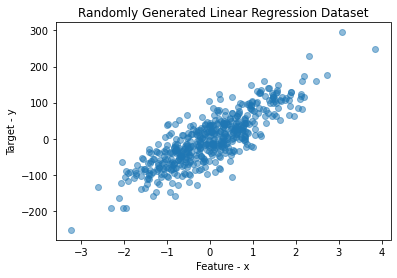

In [27]:
plt.scatter(X, y, alpha=0.5)
plt.xlabel("Feature - x")
plt.ylabel("Target - y")
plt.title("Randomly Generated Linear Regression Dataset")
plt.show()

In [38]:
data = pd.DataFrame({"Feature": X.flatten(), "Target": y})

In [39]:
print(data.head())

    Feature      Target
0 -0.808298  -32.986896
1  0.096996   -0.363786
2  0.473238   16.539973
3 -1.478522 -124.433848
4 -0.385314  -19.534163


In [37]:
pd.DataFrame?

## The math behind Linear Regression

We need to get a linear function that will accurately predict the output when given the input. On the picture we can see the observed (real) value for the given input and the predicted value given by the linear function. The sum of differences between observed and predicted values is called mean squared error and it looks as follows:

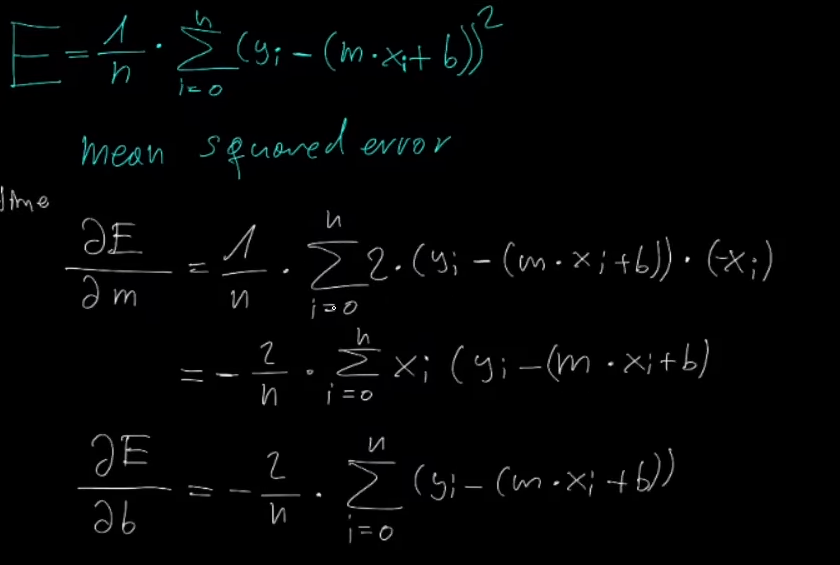

We need to minimize our mean squared error function, that is, we need to minimize our intercept and slope of our linear function. Since our mean squared error function is quadratic, we know that it will have a minimimum value as the slope of the curve reaches zero.

Considering that, we will need to preform gradient descent: we will calculate the derivative of our loss function with respect to both intercept and linear slope and plug in our initial values.

The value that we will get is the initial slope of the curve which most likely will be a number larger than 0. To determine the step size we will multiply our slope by a number called learning rate (0.001 in our case).

Step size iz then subtracted from our ould intercept/linear slope value and we get our new intercept/linear slope value. We repeat the process until our step size is smaller than 0.001 which is our minimum step size. After that we have our optimal intercept and slope for our linear equation.

In [83]:
def gradient_descent(m_now, b_now, learning_rate):
    
    derivative_m = 0
    derivative_b = 0
    n = len(data)
    
    for _, row in data.iterrows():
        y_i = row["Target"]
        x_i = row["Feature"]
        
        derivative_m += (-2/n) * x_i * (y_i - (m_now * x_i + b_now)) 
        derivative_b += (-2/n) * (y_i - (m_now * x_i + b_now))
        
    step_size_m = derivative_m * learning_rate
    step_size_b = derivative_b * learning_rate
    
    m = m_now - step_size_m
    b = b_now - step_size_b
    
    return m,b

In [84]:
# initializing linear function y = x  (y = mx + b)

m = 1
b = 0
learning_rate = 0.001
epochs = 5000

for i in range(epochs):
    m, b = gradient_descent(m, b, learning_rate)
    
print(m,b)

62.338564006743184 -1.566759357989988


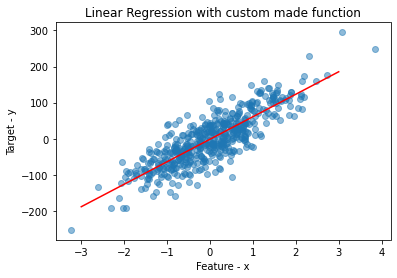

In [95]:
plt.scatter(X, y, alpha=0.5)
plt.xlabel("Feature - x")
plt.ylabel("Target - y")
plt.title("Linear Regression with custom made function")
plt.plot(list(range(-3, 4)), [m * x + b for x in range(-3,4)], color="red")
plt.show()

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
model = LinearRegression()

In [88]:
model.fit(X,y)

LinearRegression()

In [91]:
y_pred = model.predict(X)

print(f"Intercept (b): {model.intercept_}")
print(f"Coefficient (m): {model.coef_[0]}")

Intercept (b): -1.5670613230028048
Coefficient (m): 62.34265467006256


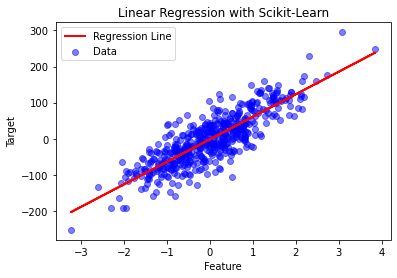

In [96]:
plt.scatter(X, y, color='blue', alpha=0.5, label="Data")
plt.plot(X, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression with Scikit-Learn")
plt.legend()
plt.show()
